# Setup

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Loading data

In [11]:
movies = pd.read_csv('./ml-1m/movies.dat', sep='::', engine='python', encoding='ISO-8859-1', 
                     names=['MovieID', 'Title', 'Genres'])
ratings = pd.read_csv('./ml-1m/ratings.dat', sep='::', engine='python', encoding='ISO-8859-1', 
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv('./ml-1m/users.dat', sep='::', engine='python', encoding='ISO-8859-1', 
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# EDA

In [12]:
dfs = {
    "### Movies": movies,
    "### Ratings": ratings,
    "### Users": users
}

# Render the DataFrames with titles
for title, df in dfs.items():
    display(Markdown(title))
    display(df.head(3).style.set_table_attributes("style='display:inline'"))
    display(Markdown("<br>"))

### Movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


<br>

### Ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


<br>

### Users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


<br>

We can see that the tables contain the following features:

- **Movies**
    - **MovieID**: Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries. Also, movies are mostly entered by hand, so errors and inconsistencies may exist.
    - **Title**: Titles are identical to titles provided by the IMDB (including year of release).
    - **Genres**: Genres are pipe-separated and are selected from the following genres:
    	* Action
    	* Adventure
    	* Animation
    	* Children's
    	* Comedy
    	* Crime
    	* Documentary
    	* Drama
    	* Fantasy
    	* Film-Noir
    	* Horror
    	* Musical
    	* Mystery
    	* Romance
    	* Sci-Fi
    	* Thriller
    	* War
    	* Western

- **Ratings**
    - **UserID**: UserIDs range between 1 and 6040.
    - **MovieID**: MovieIDs range between 1 and 3952.
    - **Rating**: Ratings are made on a 5-star scale (whole-star ratings only).
    - **Timestamp**: Timestamp is represented in seconds since the epoch as returned by time(2).
    - Additionally, each user has at least 20 ratings.
- **Users**
    - **UserID**: IDs given to each user.
    - **Gender**: Gender is denoted by a "M" for male and "F" for female.
    - **Age**: Age is chosen from the following ranges:
        *  1:  "Under 18"
    	* 18:  "18-24"
    	* 25:  "25-34"
    	* 35:  "35-44"
    	* 45:  "45-49"
    	* 50:  "50-55"
    	* 56:  "56+"
    - **Occupation**: Occupation is chosen from the following choices:
        *  0:  "other" or not specified
    	*  1:  "academic/educator"
    	*  2:  "artist"
    	*  3:  "clerical/admin"
    	*  4:  "college/grad student"
    	*  5:  "customer service"
    	*  6:  "doctor/health care"
    	*  7:  "executive/managerial"
    	*  8:  "farmer"
    	*  9:  "homemaker"
    	* 10:  "K-12 student"
    	* 11:  "lawyer"
    	* 12:  "programmer"
    	* 13:  "retired"
    	* 14:  "sales/marketing"
    	* 15:  "scientist"
    	* 16:  "self-employed"
    	* 17:  "technician/engineer"
    	* 18:  "tradesman/craftsman"|
    	* 19:  "unemployed"
    	* 20:  "writer"
    - **Zip-code**: User zip-code
    - Additionally, all demographic information is provided voluntarily by the users and is not checked for accuracy.  Only users who have provided some demographic information are included in this data set.

Looking at the number of items in each table, we see:

In [13]:
# Render the DataFrames with titles
for title, df in dfs.items():
    display(Markdown(title))
    display(df.info())
    display(Markdown("<br>"))

### Movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


None

<br>

### Ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


None

<br>

### Users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


None

<br>

In total, we have **3,833 different movies**, **6,040** different users, and **1,000,209** different ratings.

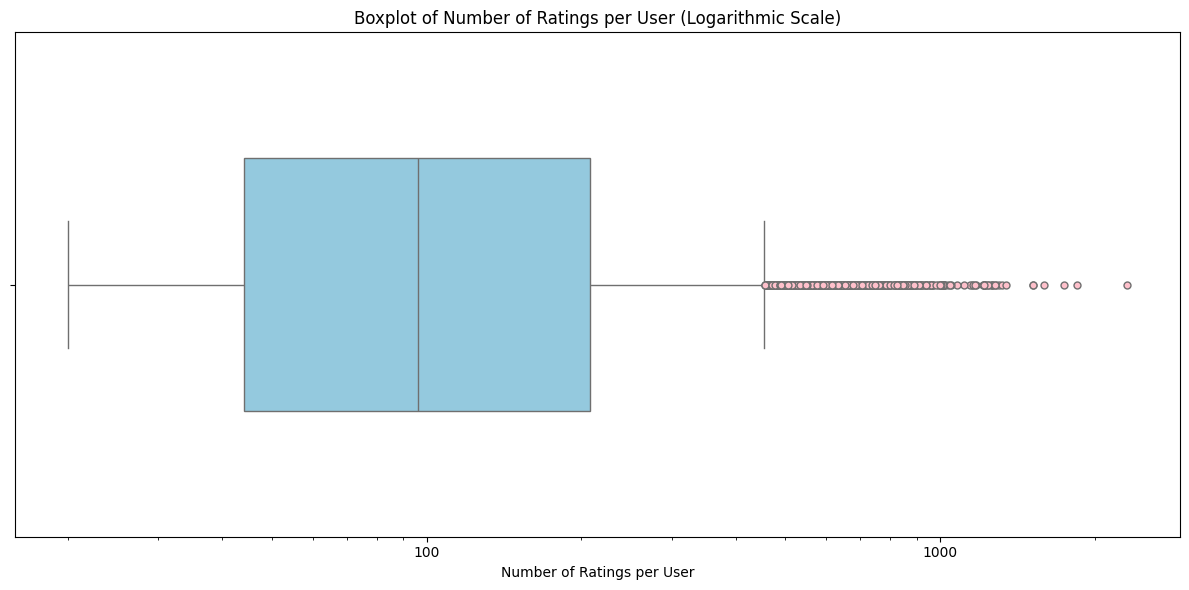

In [16]:
from matplotlib.ticker import LogLocator, LogFormatter

# Compute the number of ratings per user
user_rating_counts = ratings.groupby('UserID').size().reset_index(name='rating_count')

# Create the boxplot with data on the x-axis
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=user_rating_counts['rating_count'],
    orient='h',
    width=0.5,
    color='skyblue',
    flierprops=dict(markerfacecolor='pink', markersize=5, linestyle='none')
)

# Set the x-axis to logarithmic scale
plt.xscale('log')

# Use LogLocator and LogFormatter to set x-axis ticks dynamically
ax = plt.gca()  # Get the current axes

# Set major ticks at powers of 10
ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=15))
ax.xaxis.set_major_formatter(LogFormatter())

plt.xlabel('Number of Ratings per User')
plt.title('Boxplot of Number of Ratings per User (Logarithmic Scale)')
plt.tight_layout()
plt.show()

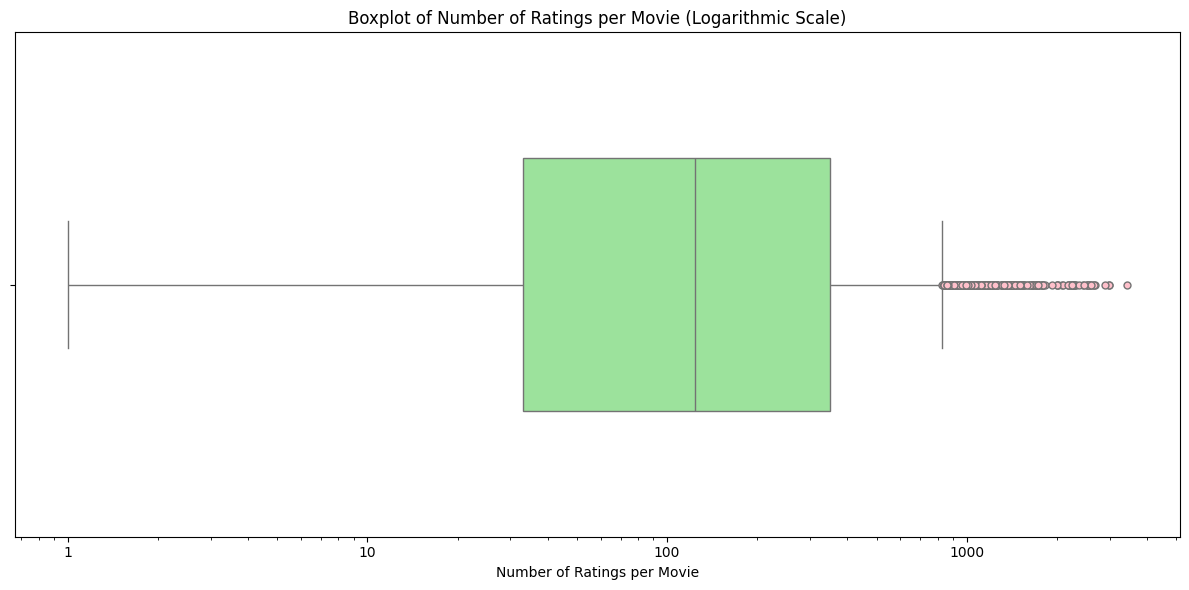

In [17]:
# Compute number of ratings per movie
movie_rating_counts = ratings.groupby('MovieID').size().reset_index(name='rating_count')

# Create the boxplot with data on the x-axis
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=movie_rating_counts['rating_count'],
    orient='h',
    width=0.5,
    color='lightgreen',
    flierprops=dict(markerfacecolor='pink', markersize=5, linestyle='none')
)

# Set the x-axis to logarithmic scale
plt.xscale('log')

# Use LogLocator and LogFormatter to set x-axis ticks dynamically
ax = plt.gca()
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0))
ax.xaxis.set_major_formatter(plt.LogFormatter())

plt.xlabel('Number of Ratings per Movie')
plt.title('Boxplot of Number of Ratings per Movie (Logarithmic Scale)')
plt.tight_layout()
plt.show()


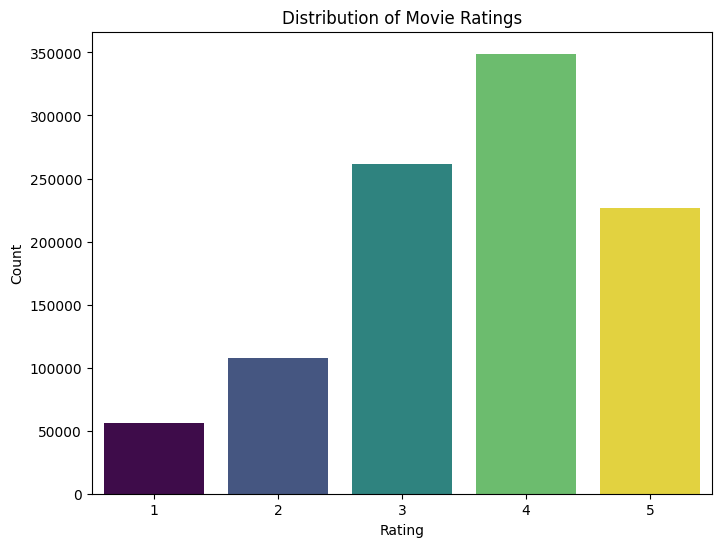

In [25]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=ratings, hue='Rating', legend=False, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

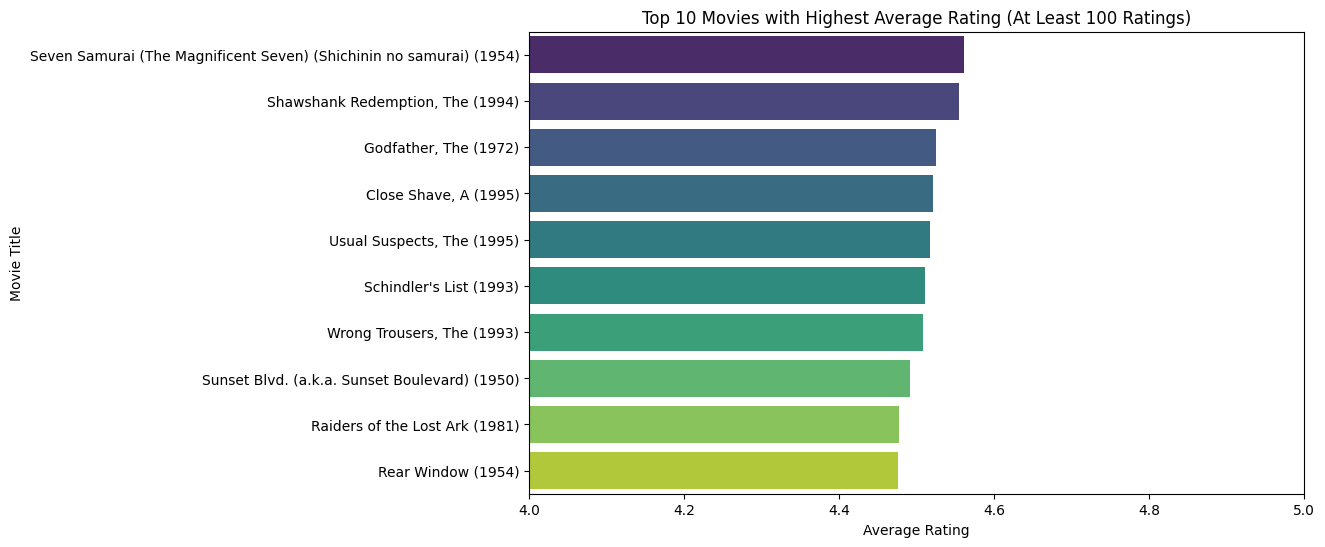

In [30]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Compute average rating and number of ratings per movie
movie_stats = ratings_movies.groupby('Title').agg(
    average_rating=('Rating', 'mean'),
    rating_count=('Rating', 'count')
).reset_index()

# Filter movies with at least 100 ratings
popular_movies = movie_stats[movie_stats['rating_count'] >= 100]

# Get top 10 movies by average rating
top_movies = popular_movies.sort_values('average_rating', ascending=False).head(10)

# Plot top 10 movies
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='Title', data=top_movies, hue='Title', legend=False, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Highest Average Rating (At Least 100 Ratings)')
plt.xlim(4, 5)
plt.show()

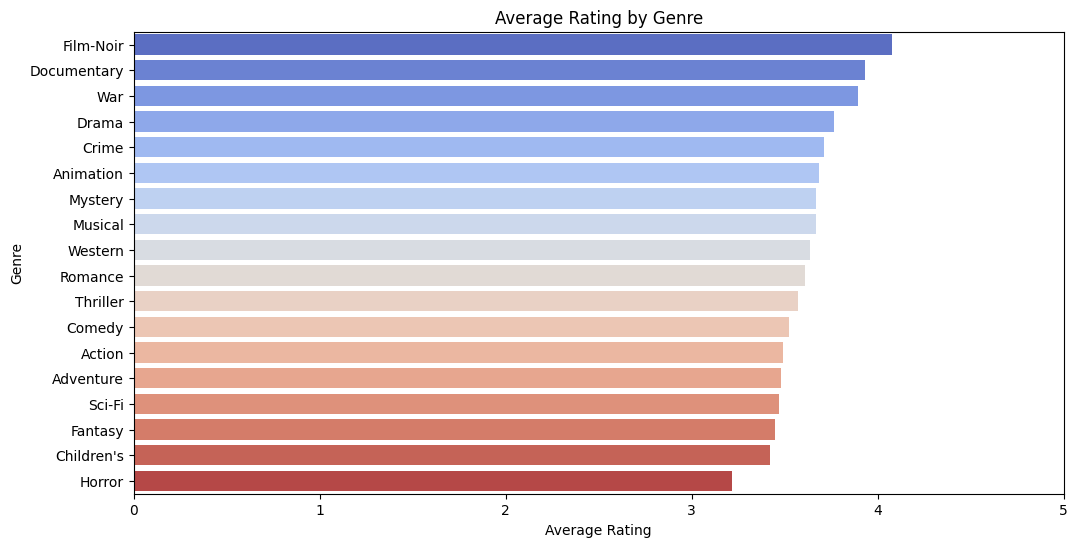

In [34]:
# Split genres into separate rows
movies_genres = movies.copy()
movies_genres['Genres'] = movies_genres['Genres'].str.split('|')
movies_genres = movies_genres.explode('Genres')

# Merge with ratings
ratings_genres = pd.merge(ratings, movies_genres, on='MovieID')

# Compute average rating per genre
genre_stats = ratings_genres.groupby('Genres')['Rating'].mean().reset_index()
genre_stats = genre_stats.sort_values('Rating', ascending=False)

# Plot average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Genres', data=genre_stats, hue='Genres', legend=False, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.xlim(0, 5)
plt.show()